# Setup enviorment

In [1]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

# Machine learning models and preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

# Epiweek
from epiweeks import Week, Year

# Date
from datetime import date as convert_to_date

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
embeddings = 'Embeddings/embeddings_vae_1024features.csv'
labels = 'Tabular_data/Label_CSV_All_Municipality.csv'

# Read Data

In [4]:
def epiweek_from_date(image_date):
    date = image_date.split('-')
    
    # Get year as int
    year = ''.join(filter(str.isdigit, date[0]))
    year = int(year)
    
    # Get month as int
    month = ''.join(filter(str.isdigit, date[1]))
    month = int(month)
    
    # Get day as int
    day = ''.join(filter(str.isdigit, date[2]))
    day = int(day)
    
    # Get epiweek:
    date = convert_to_date(year, month, day)
    epiweek = str(Week.fromdate(date))
    epiweek = int(epiweek)
    
    return epiweek

### 1. Features

In [5]:
def read_features(path, Municipality = None):
    df = pd.read_csv(path)
    #df.Date = pd.to_datetime(df.Date)
    
    if Municipality:
        print('Obtaining dataframe for the city of Medellin only...')
        df = df[df['Municipality Code'] == Municipality]
        
    df.Date = df.Date.apply(epiweek_from_date)
    
    df = df.sort_values(by=['Date'])
    
    df = df.set_index('Date')
    
    if Municipality:
        df.drop(columns=['Municipality Code'], inplace=True)
        
    df.index.name = None
    return df

In [6]:
features_df = read_features(path=embeddings, Municipality='Medellín')
features_df

Obtaining dataframe for the city of Medellin only...


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
201544,-0.046489,-1.407201,-1.148883,0.836687,-0.190778,1.802231,0.517497,-1.146697,0.119171,1.544828,...,-0.678144,-0.036498,-0.303533,0.248490,-0.811357,-0.832925,-0.739305,-0.295200,-0.038603,0.485674
201545,0.327904,-0.701594,0.306197,-0.796750,-1.037395,0.857556,0.167456,1.642044,-0.473234,0.181270,...,-0.897844,-0.661285,-1.146673,-1.234707,-0.184185,-0.140669,-2.367193,-0.463623,-0.668936,-0.233073
201546,-1.634988,-0.882196,0.291420,-2.686286,-0.684004,-0.407912,1.827255,0.327352,0.987357,0.781570,...,0.906685,1.372330,-0.333867,0.728862,-0.005498,-0.743434,0.597319,0.195301,-0.850010,0.492581
201547,1.789035,0.854698,-2.904163,-1.008464,-0.165688,0.597984,0.142369,0.164123,1.069377,0.236612,...,0.254610,-0.536157,-0.424962,0.685125,-0.029501,0.095485,0.379560,-0.297148,-1.211405,0.443391
201548,-0.983180,0.145126,0.720849,1.524544,0.620878,-1.807810,0.340521,0.781281,-0.395229,-0.769379,...,1.562922,0.585608,-0.675990,0.232964,0.788353,0.147064,0.094748,-0.206415,1.170020,0.276934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201848,-0.177821,0.800357,0.158949,2.573438,1.615337,-0.998008,1.096824,-0.023870,-0.667530,-1.929526,...,2.209477,0.241274,-1.311355,0.955204,0.006918,0.715542,-0.870650,-0.205803,0.835786,1.692061
201849,-0.306444,1.308680,1.067536,-0.931025,-1.046062,2.075529,-0.501223,-2.267342,0.095569,-0.845871,...,-2.447275,0.293684,-1.791375,-0.086890,0.917567,0.631528,-2.004170,0.267849,1.151415,-1.051147
201850,-0.151392,0.071449,0.356428,0.259774,-0.383608,1.065443,0.450759,0.322183,-1.307717,-0.181305,...,1.033319,0.951084,0.638319,-0.277678,0.032450,-0.329121,-0.322632,-1.898407,-0.602611,-0.267056
201851,-0.793142,-0.539722,-1.165816,-0.199017,2.244849,0.917043,-0.467799,0.353362,1.053764,0.443968,...,0.882802,-0.827243,-0.127070,-1.308614,-1.632518,1.059085,1.047949,-2.762428,-0.955669,0.913588


### 2. Labels

In [7]:
def get_epiweek(name):
    
    # Get week
    week = name.split('/')[1]
    week = week.replace('w','')
    week = int(week)
    
    # Year
    year = name.split('/')[0]
    year = int(year)
    
    epiweek = Week(year, week)
    
    epiweek = str(epiweek)
    epiweek = int(epiweek)

    return epiweek

In [8]:
def read_labels(path, Municipality = None):
    df = pd.read_csv(path)
    if df.shape[1] > 678:
        df = pd.concat([df[['Municipality code', 'Municipality']], df.iloc[:,-676:]], axis=1)
        cols = df.iloc[:, 2:].columns
        new_cols = df.iloc[:, 2:].columns.to_series().apply(get_epiweek)
        df = df.rename(columns=dict(zip(cols, new_cols))) 
        
    if 'Label_CSV_All_Municipality' in path:
        # Get Columns
        df = df[['epiweek', 'Municipality code', 'Municipality', 'final_cases_label']]
        
        # change epiweek format
        df.epiweek = df.epiweek.apply(get_epiweek)
        
        # Remove duplicates
        df = df[df.duplicated(['epiweek','Municipality code','Municipality']) == False]
        
        # Replace Increase, decrease, stable to numerical:
        """
        - Stable = 0
        - Increased = 1 
        - Decreased = 2
        """
        df.final_cases_label = df.final_cases_label.replace({'Stable': 0, 'Increased': 1, 'Decreased': 2})
        
        # Create table
        df = df.pivot(index=['Municipality code', 'Municipality'], columns='epiweek', values='final_cases_label')

        # Reset Index:
        df = df.reset_index()
    
    if Municipality:
        df = df[df['Municipality'] == Municipality]
        df.drop(columns=['Municipality code'], inplace=True)
        df.rename(columns={'Municipality': 'Municipality Code'}, inplace=True)
    
        df = df.set_index('Municipality Code')
        df = df.T

        df.columns.name = None
        df.index.name = None
        
        df.columns = ['Labels']
    
    return df

In [9]:
labels_df = read_labels(path=labels, Municipality='Medellín')
labels_df

,Labels
201601,0
201602,1
201603,2
201604,0
201605,0
...,...
201848,0
201849,2
201850,1
201851,0


# Data preparation

In [10]:
# Merge the two dataframes based on the date values
dengue_df = features_df.merge(labels_df, how='inner', left_index=True, right_index=True)
dengue_df

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Labels
201601,1.287487,-0.688955,-0.794426,-1.238838,1.239369,1.784700,-0.000341,0.525795,0.363034,0.825218,...,-0.552195,0.814902,-0.439056,0.675143,-1.017167,-0.206480,-0.043412,-1.014832,-1.435265,0
201602,-1.399851,-0.211775,1.341302,0.132593,-0.097550,0.159015,-1.474547,-1.294940,1.222341,-0.381582,...,0.472349,-0.074173,-0.420181,-1.341189,-0.138499,-1.804684,-0.662659,0.475712,0.201907,1
201603,-0.405975,0.289439,-0.377020,-0.355364,-1.054876,0.712196,0.927682,-0.470455,-0.252064,1.062808,...,0.859062,0.207351,-0.587504,0.340662,0.299123,0.405674,-2.638784,0.780803,-1.659373,2
201604,0.844463,-1.315463,2.082394,2.693551,-1.234441,1.570999,0.279815,0.831815,-0.229177,-0.052932,...,-0.676744,-1.113252,0.959280,-0.753616,1.713913,1.536158,-1.955070,0.051035,-1.663397,0
201605,-0.541275,0.475828,0.136089,0.335247,1.387429,0.863202,-1.643587,-0.673929,-0.331307,-1.289601,...,-1.524215,-0.919285,-0.362812,-0.104197,-0.509349,0.104454,-3.172053,0.055130,0.444714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201848,-0.177821,0.800357,0.158949,2.573438,1.615337,-0.998008,1.096824,-0.023870,-0.667530,-1.929526,...,0.241274,-1.311355,0.955204,0.006918,0.715542,-0.870650,-0.205803,0.835786,1.692061,0
201849,-0.306444,1.308680,1.067536,-0.931025,-1.046062,2.075529,-0.501223,-2.267342,0.095569,-0.845871,...,0.293684,-1.791375,-0.086890,0.917567,0.631528,-2.004170,0.267849,1.151415,-1.051147,2
201850,-0.151392,0.071449,0.356428,0.259774,-0.383608,1.065443,0.450759,0.322183,-1.307717,-0.181305,...,0.951084,0.638319,-0.277678,0.032450,-0.329121,-0.322632,-1.898407,-0.602611,-0.267056,1
201851,-0.793142,-0.539722,-1.165816,-0.199017,2.244849,0.917043,-0.467799,0.353362,1.053764,0.443968,...,-0.827243,-0.127070,-1.308614,-1.632518,1.059085,1.047949,-2.762428,-0.955669,0.913588,0


### Train Test split

In [11]:
def train_test_split(df, train_percentage = 80):
    # We need a sequence so we can't split randomly
    # To divide into Train and test we have to calculate the train percentage of the dataset:
    size = df.shape[0]
    split = int(size*(train_percentage/100))
    
    """ Train """
    # We will train with 1st percentage % of data and test with the rest
    train_df = df.iloc[:split,:] ## percentage % train
    
    """ Test """
    test_df = df.iloc[split:,:] # 100 - percentage % test
    
    print(f'The train shape is: {train_df.shape}')
    print(f'The test shape is: {test_df.shape}')
    
    return train_df, test_df

In [12]:
train_df, test_df = train_test_split(dengue_df, train_percentage = 80)

The train shape is: (124, 1025)
The test shape is: (32, 1025)


### Normalize features

In [13]:
# Normalize train data and create the scaler
def normalize_train_features(df, feature_range=(-1, 1)):
    
    scalers = {}
    # For each column in the dataframe
    for column in df.columns:
        # Get values of the column
        values = df[column].values.reshape(-1,1)
        # Generate a new scaler
        scaler = MinMaxScaler(feature_range=feature_range)
        # Fit the scaler just for that column
        scaled_column = scaler.fit_transform(values)
        # Add the scaled column to the dataframe
        scaled_column = np.reshape(scaled_column, len(scaled_column))
        df[column] = scaled_column
        
        # Save the scaler of the column
        scalers['scaler_' + column] = scaler
        
    print(f' Min values are: ')
    print(df.min())
    print(f' Max values are: ')
    print(df.max())
        
    return df, scalers


""" If you want to use the same scaler used in train, you can use this function"""
def normalize_test_features(df, scalers=None):
    
    if not scalers:
        raise TypeError("You should provide a list of scalers.")
        
    for column in df.columns:
        # Get values of the column
        values = df[column].values.reshape(-1,1)
        # Take the scaler of that column
        scaler = scalers['scaler_' + column]
        # Scale values
        scaled_column = scaler.transform(values)
        scaled_column = np.reshape(scaled_column,len(scaled_column))
        # Add the scaled values to the df
        df[column] = scaled_column
        
    print(f' Min values are: ')
    print(df.min())
    print(f' Max values are: ')
    print(df.max())
        
    return df 

In [14]:
feature_range = (-1, 1)

# Scale train:
train_df, scalers = normalize_train_features(train_df, feature_range=feature_range)

#print(f'The scalers are: {scalers}')

train_df.head()

 Min values are: 
0        -1.0
1        -1.0
2        -1.0
3        -1.0
4        -1.0
         ... 
1020     -1.0
1021     -1.0
1022     -1.0
1023     -1.0
Labels   -1.0
Length: 1025, dtype: float64
 Max values are: 
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
1020      1.0
1021      1.0
1022      1.0
1023      1.0
Labels    1.0
Length: 1025, dtype: float64


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Labels
201601,0.717415,-0.264619,-0.512345,-0.596061,0.474445,0.534150,-0.046372,-0.033960,0.317819,0.237751,...,-0.334421,0.420704,-0.131012,0.127058,-0.319972,0.037591,0.106643,-0.352494,-0.615821,-1.0
201602,-0.419614,-0.077807,0.419405,-0.042335,0.008382,-0.073435,-0.675073,-0.723629,0.606674,-0.262004,...,0.000151,0.070641,-0.122372,-0.760683,-0.018953,-0.522950,-0.092673,0.164985,0.116053,0.0
201603,0.000901,0.118415,-0.330244,-0.239351,-0.325351,0.133311,0.349401,-0.411326,0.111055,0.336141,...,0.126434,0.181488,-0.198964,-0.020205,0.130970,0.252293,-0.728723,0.270905,-0.716005,1.0
201604,0.529969,-0.509892,0.742719,0.991672,-0.387949,0.454282,0.073106,0.081956,0.118748,-0.125905,...,-0.375093,-0.338485,0.509073,-0.501989,0.615657,0.648789,-0.508657,0.017548,-0.717804,-1.0
201605,-0.056345,0.191385,-0.106391,0.039488,0.526060,0.189748,-0.747163,-0.488399,0.084417,-0.638029,...,-0.651840,-0.262113,-0.096112,-0.216066,-0.146001,0.146645,-0.900364,0.018970,0.224596,-1.0


In [15]:
# Scale test:
test_df = normalize_test_features(test_df, scalers=scalers)
test_df.head()

 Min values are: 
0        -0.611774
1        -0.698647
2        -1.492308
3        -0.577689
4        -0.528444
            ...   
1020     -0.645408
1021     -0.768519
1022     -0.468700
1023     -1.009303
Labels   -1.000000
Length: 1025, dtype: float64
 Max values are: 
0         0.798543
1         0.992657
2         0.376680
3         0.943176
4         0.824965
            ...   
1020      0.705626
1021      0.787044
1022      0.451219
1023      0.782204
Labels    1.000000
Length: 1025, dtype: float64


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Labels
201821,0.084599,0.542881,-0.384070,-0.080906,0.138302,0.078038,-0.007716,-0.031384,-0.545694,-0.072470,...,-0.445808,-0.618029,-0.699482,0.136318,0.328906,0.342614,0.063277,0.219823,0.294464,-1.0
201822,0.798543,0.992657,-0.493325,-0.416277,0.266510,-0.591903,0.565659,-0.179126,0.237211,0.382436,...,0.249908,-0.116217,0.201944,-0.673409,-0.036940,-0.021246,0.060466,0.102064,0.112100,-1.0
201823,0.247549,-0.247999,0.253891,0.300498,0.187533,-0.202666,-0.067352,-0.504047,0.361369,0.378615,...,-0.429229,-0.519579,-0.290135,0.185387,0.484507,-0.645408,-0.595917,-0.186724,-0.197858,-1.0
201824,0.420624,0.373608,-0.799224,0.511320,-0.279726,-0.603021,0.154349,-0.543294,0.365547,0.051451,...,-0.589635,-0.518102,-0.053085,-0.549938,0.159301,0.492040,-0.004100,0.447210,-0.103205,-1.0
201825,0.155971,-0.698647,0.350023,-0.577689,0.674053,-0.199004,0.069916,-0.071021,0.025623,-0.410628,...,-0.618929,0.493415,-0.164270,0.157324,-0.432406,0.355685,0.165775,0.352219,0.450566,-1.0


### Prepare data for time series supervised learning (function to create sliding window)

In [16]:
# prepare data for time series

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
# length of window
days = 10

# frame as supervised learning
train = series_to_supervised(train_df, n_in=days)
test = series_to_supervised(test_df, n_in=days)

DataFrame(train)

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var7(t-10),var8(t-10),var9(t-10),var10(t-10),...,var1016(t),var1017(t),var1018(t),var1019(t),var1020(t),var1021(t),var1022(t),var1023(t),var1024(t),var1025(t)
201611,0.717415,-0.264619,-0.512345,-0.596061,0.474445,0.534150,-0.046372,-0.033960,0.317819,0.237751,...,-0.696725,-0.026334,0.148737,-0.063537,0.342771,-0.026400,0.267312,-0.061181,-0.022407,0.0
201612,-0.419614,-0.077807,0.419405,-0.042335,0.008382,-0.073435,-0.675073,-0.723629,0.606674,-0.262004,...,-0.242723,0.333258,0.515570,-0.123022,-0.496992,0.268676,0.079583,0.241669,-0.595634,0.0
201613,0.000901,0.118415,-0.330244,-0.239351,-0.325351,0.133311,0.349401,-0.411326,0.111055,0.336141,...,-0.206523,-0.491134,-0.126848,0.661713,0.153685,0.229164,-0.463973,0.053713,-0.975594,0.0
201614,0.529969,-0.509892,0.742719,0.991672,-0.387949,0.454282,0.073106,0.081956,0.118748,-0.125905,...,0.212263,-0.493523,0.285252,-0.459350,0.118487,0.717821,0.011011,-0.017436,1.000000,1.0
201615,-0.056345,0.191385,-0.106391,0.039488,0.526060,0.189748,-0.747163,-0.488399,0.084417,-0.638029,...,-0.224177,1.000000,0.502082,-0.235513,0.015692,0.535678,0.225521,0.046232,0.145397,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201816,0.161418,0.059350,-0.407217,-0.322475,0.280339,0.312166,0.115440,-0.833810,-0.187396,-0.351217,...,-0.475471,0.236124,0.353747,0.397505,0.451361,-0.138578,-0.306785,0.371796,-0.192488,-1.0
201817,0.887821,-0.180743,-0.405007,-0.110293,-0.760965,0.572115,-0.546911,-0.084733,0.133753,-0.301270,...,-0.073411,0.135366,-1.000000,-0.207863,0.403494,0.488648,-0.299530,-0.063334,0.803492,-1.0
201818,0.554046,0.137046,0.084558,0.011125,-0.421474,-0.790012,-0.537559,0.433995,0.491965,0.484942,...,-0.024630,-0.198176,-0.160777,-0.014544,0.017891,0.102530,0.360620,-0.128165,-0.316256,-1.0
201819,0.149763,-0.577400,-0.319449,-0.402680,-0.085460,-0.189519,-0.881927,0.317386,-0.189051,0.544778,...,-0.190107,-0.052215,0.255767,-0.741897,0.086524,0.102446,0.620181,0.121715,0.747221,-1.0


### Features and Labels Set

In [18]:
def features_labels_set(timeseries_data, original_df):
    
    """ Features """
    # We define the number of features as (Cases and media cloud)
    n_features = original_df.shape[1]

    # The features to train the model will be all except the values of the actual week 
    # We can't use other variables in week t because whe need to resample a a 3D Array
    features_set = DataFrame(timeseries_data.values[:,:-n_features])
    # Convert pandas data frame to np.array to reshape as 3D Array
    features_set = features_set.to_numpy()
    print(f'The shape of the features is {features_set.shape}')
    
    """ Labels """
    # We will use Covid cases in last week 
    labels_set = DataFrame(timeseries_data.values[:,-1])
    # Convert pandas data frame to np.array
    labels_set = labels_set.to_numpy()
    print(f'The shape of the labels is {labels_set.shape}')
    
    return features_set, labels_set, n_features

In [19]:
# Train features and labels set
print('Train:')
train_X, train_y, n_features = features_labels_set(timeseries_data=train, original_df=dengue_df)

# Test features and labels set
print('Test:')
test_X, test_y, n_features = features_labels_set(timeseries_data=test, original_df=dengue_df)

Train:
The shape of the features is (114, 10250)
The shape of the labels is (114, 1)
Test:
The shape of the features is (22, 10250)
The shape of the labels is (22, 1)


In [20]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

# Modeling

In [21]:
def reshape_tensor(train_X, test_X, n_features):
    print('The initial shapes are:')
    print(f'The train shape is {train_X.shape}')
    print(f'The test shape is {test_X.shape}')
    
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], days, n_features))
    test_X = test_X.reshape((test_X.shape[0], days, n_features))
    
    print('-----------------------')
    print('The Final shapes are:')
    print(f'The train shape is {train_X.shape}')
    print(f'The test shape is {test_X.shape}')
    
    return train_X, test_X

In [22]:
# reshape input to be 3D [samples, timesteps, features]
train_X, test_X = reshape_tensor(train_X, test_X, n_features)

The initial shapes are:
The train shape is (114, 10250)
The test shape is (22, 10250)
-----------------------
The Final shapes are:
The train shape is (114, 10, 1025)
The test shape is (22, 10, 1025)


# Define the Model

In [23]:
# Set Seed
tf.random.set_seed(0)

# design network
model = Sequential()
model.add(LSTM(120, dropout=0.1, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(240, dropout=0.1, input_shape=(train_X.shape[1], 120)))
model.add(Dense(60))
model.add(Dense(3, activation='softmax'))

In [24]:
opt = keras.optimizers.Adam()
metric = tf.keras.metrics.AUC(name='auc', multi_label=True, num_labels=3)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=metric)

# Print the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 120)           550080    
_________________________________________________________________
lstm_1 (LSTM)                (None, 240)               346560    
_________________________________________________________________
dense (Dense)                (None, 60)                14460     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 183       
Total params: 911,283
Trainable params: 911,283
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

In [26]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[monitor])

Epoch 1/50
8/8 - 3s - loss: 0.9423 - auc: 0.5974 - val_loss: 0.6063 - val_auc: 0.6677
Epoch 2/50
8/8 - 0s - loss: 0.9689 - auc: 0.4899 - val_loss: 0.7013 - val_auc: 0.5186
Epoch 3/50
8/8 - 0s - loss: 0.7005 - auc: 0.8296 - val_loss: 0.5027 - val_auc: 0.5726
Epoch 4/50
8/8 - 0s - loss: 0.5645 - auc: 0.8755 - val_loss: 0.4940 - val_auc: 0.6064
Epoch 5/50
8/8 - 0s - loss: 0.5331 - auc: 0.8970 - val_loss: 0.5080 - val_auc: 0.5847
Epoch 6/50
8/8 - 0s - loss: 0.4863 - auc: 0.9136 - val_loss: 0.4991 - val_auc: 0.5909
Epoch 7/50
8/8 - 0s - loss: 0.4385 - auc: 0.9266 - val_loss: 0.5139 - val_auc: 0.6093
Epoch 8/50
8/8 - 0s - loss: 0.3906 - auc: 0.9409 - val_loss: 0.5818 - val_auc: 0.6611
Epoch 9/50
8/8 - 0s - loss: 0.3471 - auc: 0.9583 - val_loss: 0.7497 - val_auc: 0.6766
Epoch 10/50
8/8 - 0s - loss: 0.3249 - auc: 0.9581 - val_loss: 0.7401 - val_auc: 0.6311
Epoch 11/50
8/8 - 0s - loss: 0.5113 - auc: 0.9328 - val_loss: 0.7396 - val_auc: 0.5246
Epoch 12/50
8/8 - 0s - loss: 0.3898 - auc: 0.9355 - 

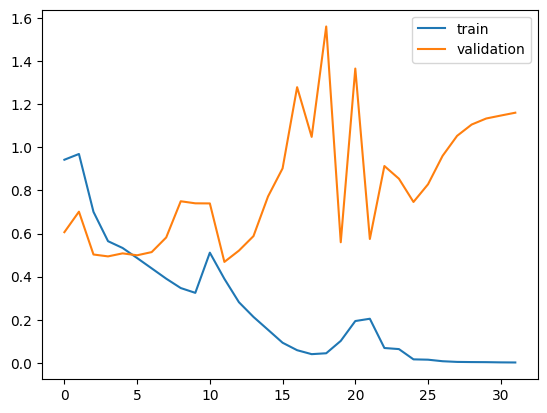

In [27]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()